In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Cargar el dataset desde el drive

df_raw = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/parcial/AR_V.csv')


In [ ]:
df_raw

,location_key,date,place_id,wikidata_id,country_code,country_name,subregion1_code,subregion1_name,iso_3166_1_alpha_2,iso_3166_1_alpha_3,...,mobility_transit_stations,mobility_workplaces,mobility_residential,average_temperature_celsius,minimum_temperature_celsius,maximum_temperature_celsius,rainfall_mm,snowfall_mm,dew_point,relative_humidity
0,AR_V,2020-01-01,ChIJISlD2c8iTLwRjdjwjDVU7oA,Q44832,AR,Argentina,V,Tierra del Fuego,AR,ARG,...,NaN,NaN,NaN,13.763889,7.472222,20.236111,0.169333,NaN,5.833333,59.396675
1,AR_V,2020-01-02,ChIJISlD2c8iTLwRjdjwjDVU7oA,Q44832,AR,Argentina,V,Tierra del Fuego,AR,ARG,...,NaN,NaN,NaN,14.555556,10.527778,22.125000,0.063500,NaN,7.291667,62.076620
2,AR_V,2020-01-03,ChIJISlD2c8iTLwRjdjwjDVU7oA,Q44832,AR,Argentina,V,Tierra del Fuego,AR,ARG,...,NaN,NaN,NaN,10.041667,5.708333,17.097222,0.190500,NaN,1.583333,55.936643
3,AR_V,2020-01-04,ChIJISlD2c8iTLwRjdjwjDVU7oA,Q44832,AR,Argentina,V,Tierra del Fuego,AR,ARG,...,NaN,NaN,NaN,10.097222,5.819444,15.597222,1.016000,NaN,3.986111,66.056469
4,AR_V,2020-01-05,ChIJISlD2c8iTLwRjdjwjDVU7oA,Q44832,AR,Argentina,V,Tierra del Fuego,AR,ARG,...,NaN,NaN,NaN,11.013889,7.847222,15.361111,2.201333,NaN,5.763889,70.542512
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,AR_V,2022-09-13,ChIJISlD2c8iTLwRjdjwjDVU7oA,Q44832,AR,Argentina,V,Tierra del Fuego,AR,ARG,...,NaN,NaN,NaN,4.472222,-0.875000,10.222222,0.000000,NaN,-0.152778,72.649411
987,AR_V,2022-09-14,ChIJISlD2c8iTLwRjdjwjDVU7oA,Q44832,AR,Argentina,V,Tierra del Fuego,AR,ARG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
988,AR_V,2022-09-15,ChIJISlD2c8iTLwRjdjwjDVU7oA,Q44832,AR,Argentina,V,Tierra del Fuego,AR,ARG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
989,AR_V,2022-09-16,ChIJISlD2c8iTLwRjdjwjDVU7oA,Q44832,AR,Argentina,V,Tierra del Fuego,AR,ARG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Columns: 187 entries, location_key to relative_humidity
dtypes: float64(151), int64(16), object(20)
memory usage: 1.4+ MB


In [ ]:

# Set display options to show all rows
pd.set_option('display.max_rows', None)
print(df_raw.dtypes)
# Reset display options to default
pd.reset_option('display.max_rows')

location_key                                  object
date                                          object
place_id                                      object
wikidata_id                                   object
country_code                                  object
country_name                                  object
subregion1_code                               object
subregion1_name                               object
iso_3166_1_alpha_2                            object
iso_3166_1_alpha_3                            object
aggregation_level                              int64
new_confirmed                                float64
new_deceased                                 float64
new_tested                                   float64
cumulative_confirmed                         float64
cumulative_deceased                          float64
cumulative_tested                            float64
new_hospitalized_patients                    float64
cumulative_hospitalized_patients             f

In [ ]:
df_raw.describe()

,aggregation_level,new_confirmed,new_deceased,new_tested,cumulative_confirmed,cumulative_deceased,cumulative_tested,new_hospitalized_patients,cumulative_hospitalized_patients,new_intensive_care_patients,...,mobility_transit_stations,mobility_workplaces,mobility_residential,average_temperature_celsius,minimum_temperature_celsius,maximum_temperature_celsius,rainfall_mm,snowfall_mm,dew_point,relative_humidity
count,991.0,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,815.000000,...,915.000000,940.000000,940.000000,984.000000,984.000000,984.000000,984.000000,105.000000,984.000000,984.000000
mean,1.0,57.384049,0.694479,124.657669,23071.439264,329.474847,49276.780368,2.261350,950.316564,0.704294,...,-42.396721,12.858511,5.990426,6.278399,2.596978,10.881775,1.061108,53.634317,1.754220,73.837143
std,0.0,100.337592,1.153419,125.080414,15904.291502,212.241794,35734.640503,2.335321,615.614246,1.013263,...,30.432603,42.481296,9.089715,3.988176,3.667957,4.834714,2.087136,43.575863,3.058697,9.368386
min,1.0,0.000000,0.000000,0.000000,3.000000,0.000000,3.000000,0.000000,0.000000,0.000000,...,-95.000000,-80.000000,-10.000000,-4.902778,-8.500000,-1.666667,0.000000,10.160000,-7.083333,45.280602
25%,1.0,2.000000,0.000000,26.500000,4928.500000,77.000000,11291.000000,1.000000,291.500000,0.000000,...,-72.000000,-16.000000,-1.000000,3.413195,0.041667,7.180556,0.000000,20.320000,-0.406250,67.038620
50%,1.0,25.000000,0.000000,100.000000,26044.000000,406.000000,50271.000000,2.000000,1053.000000,0.000000,...,-42.000000,8.000000,3.000000,6.388889,2.520834,11.027778,0.317500,40.640000,1.708333,73.675121
75%,1.0,70.000000,1.000000,184.000000,32427.000000,504.000000,80167.000000,3.000000,1470.500000,1.000000,...,-18.000000,43.250000,12.000000,9.350694,5.350694,14.534722,1.206500,71.120000,3.729166,81.192095
max,1.0,930.000000,8.000000,1053.000000,46768.000000,566.000000,101596.000000,13.000000,1843.000000,7.000000,...,30.000000,101.000000,38.000000,15.486111,11.166667,24.597222,25.315333,214.630000,10.055556,96.519859


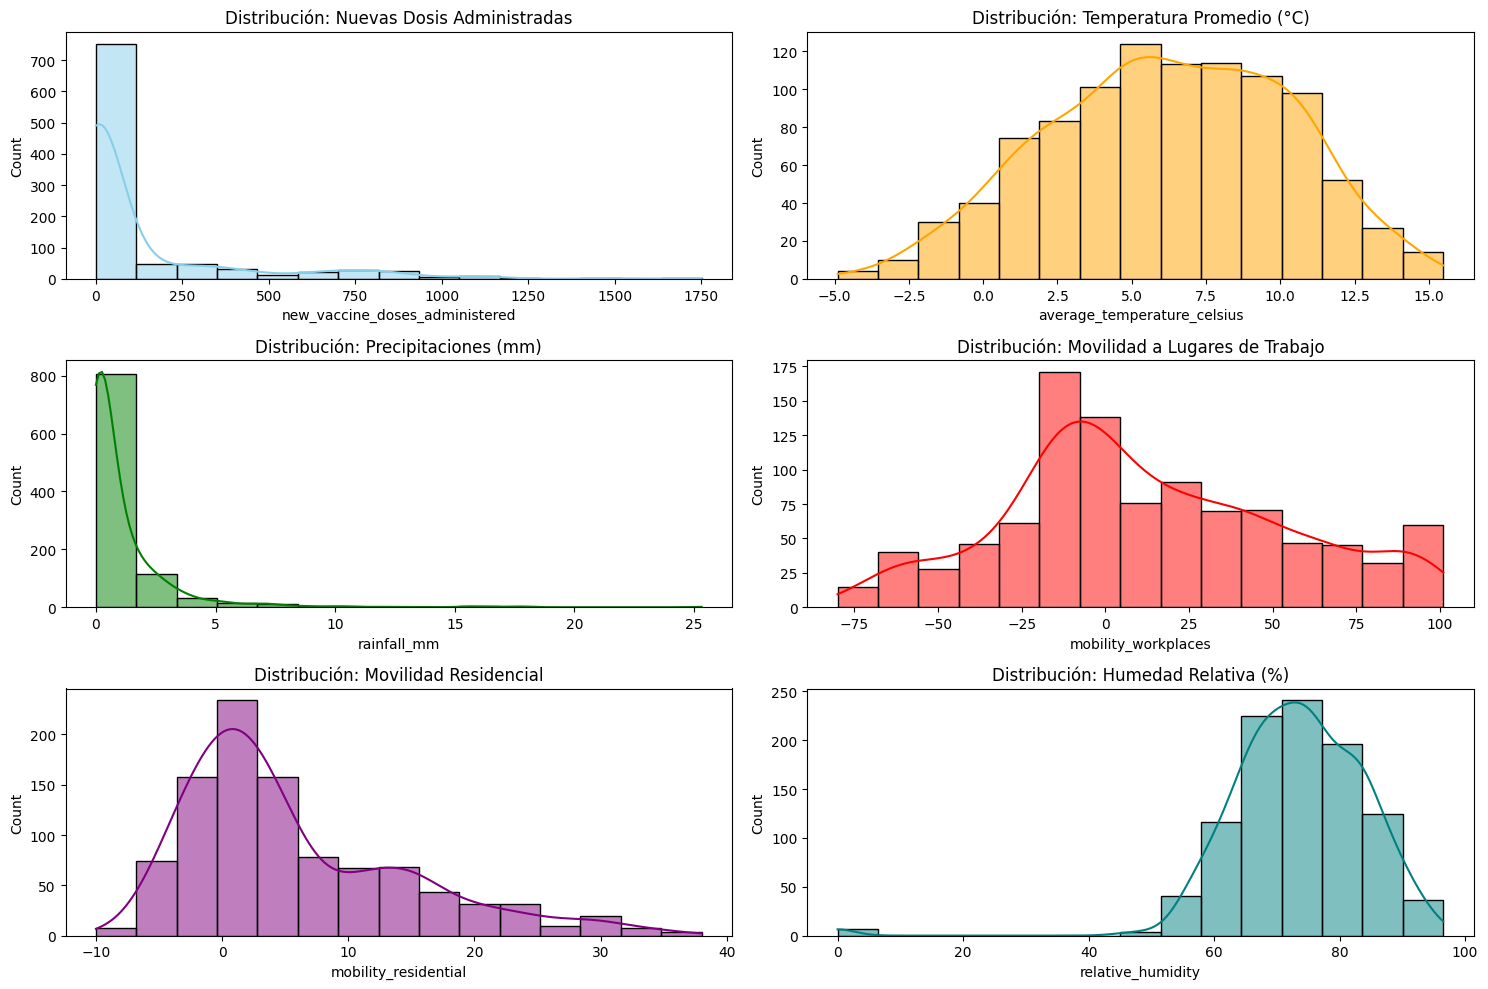

In [ ]:


plt.figure(figsize=(15, 10))

plt.subplot(3, 2, 1)
sns.histplot(df_model['new_vaccine_doses_administered'], bins=15, kde=True, color='skyblue')
plt.title('Distribución: Nuevas Dosis Administradas')

plt.subplot(3, 2, 2)
sns.histplot(df_model['average_temperature_celsius'], bins=15, kde=True, color='orange')
plt.title('Distribución: Temperatura Promedio (°C)')

plt.subplot(3, 2, 3)
sns.histplot(df_model['rainfall_mm'], bins=15, kde=True, color='green')
plt.title('Distribución: Precipitaciones (mm)')

plt.subplot(3, 2, 4)
sns.histplot(df_model['mobility_workplaces'], bins=15, kde=True, color='red')
plt.title('Distribución: Movilidad a Lugares de Trabajo')

plt.subplot(3, 2, 5)
sns.histplot(df_model['mobility_residential'], bins=15, kde=True, color='purple')
plt.title('Distribución: Movilidad Residencial')

plt.subplot(3, 2, 6)
sns.histplot(df_model['relative_humidity'], bins=15, kde=True, color='teal')
plt.title('Distribución: Humedad Relativa (%)')

plt.tight_layout()
plt.show()


# Analisis
Nuevas Dosis de Vacunas Administradas
Las dosis nuevas de vacunas administradas presentan una media de aproximadamente 272 aplicaciones por día, aunque este valor promedio esconde una gran variabilidad. El rango de vacunación va desde 0 hasta 1.751 dosis diarias, lo que indica que hubo jornadas con actividad nula y otras con campañas intensivas. La desviación estándar de 334 refleja este comportamiento irregular, señalando que las campañas de vacunación no se distribuyeron de forma homogénea a lo largo del tiempo.

Este patrón sugiere que las decisiones de vacunación estuvieron probablemente influenciadas por factores externos como la disponibilidad de dosis, políticas sanitarias, o campañas públicas. Los valores máximos podrían coincidir con operativos especiales o el inicio de nuevas etapas de vacunación por grupo etario o riesgo. En contraste, los días con cero dosis podrían reflejar fines de semana, feriados, o interrupciones logísticas.

Temperatura Promedio (°C)
La temperatura media registrada es de 7 °C, con una dispersión moderada (±3.5 °C) y un rango entre -2.2 y 15.5 °C, lo que indica que los datos se ubican en una estación fría o en una zona geográfica de clima templado a frío. Si bien las temperaturas extremas no son frecuentes, los días más fríos podrían desalentar la salida de las personas a vacunarse, afectando indirectamente la distribución diaria de las dosis.

Precipitaciones (mm)
La lluvia promedio es baja, apenas 1.06 mm por día, pero con una alta variabilidad (hasta casi 18 mm). La mediana de 0.31 mm y un cuartil inferior de 0 indican que la mayoría de los días no llovió o lo hizo mínimamente. Sin embargo, en los días de precipitaciones más intensas es posible que la afluencia a centros de vacunación haya disminuido, lo cual podría reflejarse en los valores bajos de la variable objetivo.

Movilidad hacia Lugares de Trabajo
Los cambios en movilidad laboral tienen una media del +26.7% respecto al período base, aunque los datos varían desde una caída del 62% hasta un aumento del 95%. Esta gran variabilidad indica la presencia de contextos extremos como confinamientos o reaperturas. Los días con menor movilidad laboral podrían coincidir con mayores restricciones, impactando indirectamente en la vacunación (por ejemplo, por cierres de centros o menor flujo en las calles).

Movilidad Residencial
La variación en la permanencia en los hogares presenta una media ligeramente positiva (+1.4%), con picos de hasta +24%. Este comportamiento sugiere que, en general, las personas pasaron más tiempo en sus casas, aunque los valores negativos indican momentos de mayor circulación. Una mayor permanencia en el hogar podría estar asociada con campañas de vacunación domiciliaria o con menor concurrencia a vacunatorios según la estrategia sanitaria del momento.

Humedad Relativa (%)
Con un promedio del 72% y valores que oscilan entre 45% y 96%, la humedad relativa se mantuvo generalmente alta. Esta variable, aunque menos directamente asociada a la vacunación, podría afectar aspectos operativos de los centros de vacunación al aire libre o influir en la comodidad y disposición de la población para asistir.

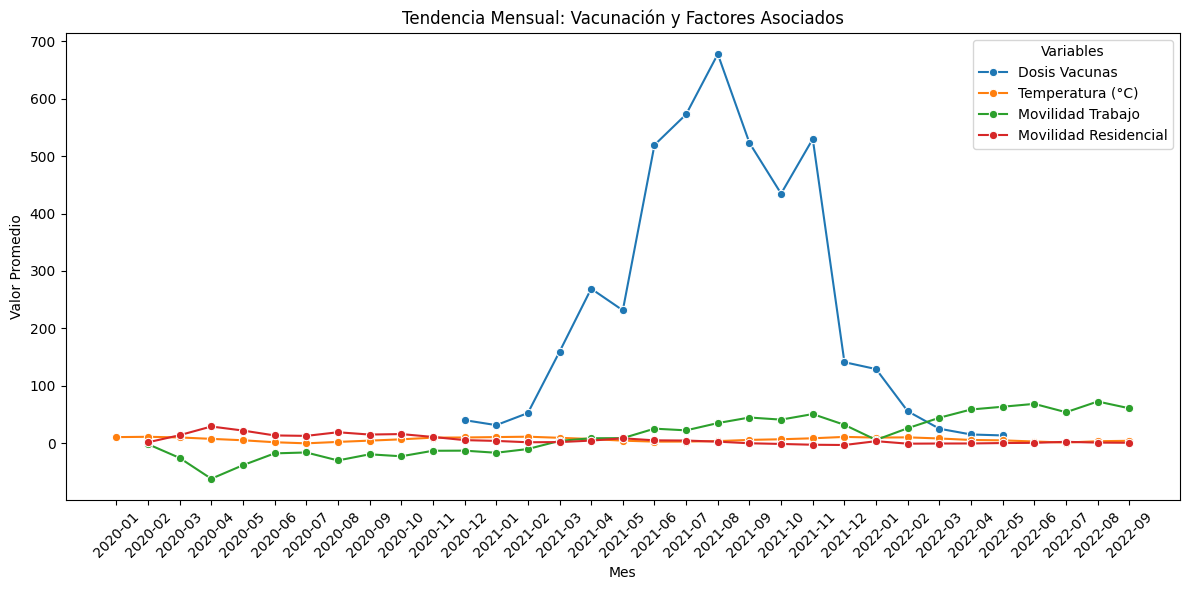

In [ ]:
# columna de fecha  en formato datetime
df_raw['date'] = pd.to_datetime(df_raw['date'])

# Ordenar por fecha
df = df_raw.sort_values('date')
df['Num_Mes'] = df_raw['date'].dt.to_period('M').astype(str)

# Agrupar por mes y calcular promedio (o suma, según prefieras)
df_mensual = df.groupby('Num_Mes')[[
    'new_vaccine_doses_administered',
    'average_temperature_celsius',
    'rainfall_mm',
    'mobility_workplaces',
    'mobility_residential',
    'relative_humidity'
]].mean().reset_index()

# gráfico
plt.figure(figsize=(12, 6))

sns.lineplot(data=df_mensual, x='Num_Mes', y='new_vaccine_doses_administered', label='Dosis Vacunas', marker='o')
sns.lineplot(data=df_mensual, x='Num_Mes', y='average_temperature_celsius', label='Temperatura (°C)', marker='o')
sns.lineplot(data=df_mensual, x='Num_Mes', y='mobility_workplaces', label='Movilidad Trabajo', marker='o')
sns.lineplot(data=df_mensual, x='Num_Mes', y='mobility_residential', label='Movilidad Residencial', marker='o')

plt.title('Tendencia Mensual: Vacunación y Factores Asociados')
plt.xlabel('Mes')
plt.ylabel('Valor Promedio')
plt.xticks(rotation=45)
plt.legend(title='Variables')
plt.tight_layout()
plt.show()


In [ ]:
# Extraer año y mes
df_raw['Año'] = df_raw['date'].dt.year
df_raw['Mes'] = df_raw['date'].dt.month
df_raw['Num_Mes'] = df_raw['date'].dt.to_period('M').astype(str)  # Ej: '2021-05'


In [ ]:
# 2. Seleccionar variables caracteristica para mi model0
features = [
    'new_vaccine_doses_administered',
    'average_temperature_celsius',
    'rainfall_mm',
    'mobility_workplaces',
    'mobility_residential',
    'relative_humidity',
    'Mes',
    'Año'
]
df_raw[features]


,new_vaccine_doses_administered,average_temperature_celsius,rainfall_mm,mobility_workplaces,mobility_residential,relative_humidity,Mes,Año
0,NaN,13.763889,0.169333,NaN,NaN,59.396675,1,2020
1,NaN,14.555556,0.063500,NaN,NaN,62.076620,1,2020
2,NaN,10.041667,0.190500,NaN,NaN,55.936643,1,2020
3,NaN,10.097222,1.016000,NaN,NaN,66.056469,1,2020
4,NaN,11.013889,2.201333,NaN,NaN,70.542512,1,2020
...,...,...,...,...,...,...,...,...
986,NaN,4.472222,0.000000,NaN,NaN,72.649411,9,2022
987,NaN,NaN,NaN,NaN,NaN,NaN,9,2022
988,NaN,NaN,NaN,NaN,NaN,NaN,9,2022
989,NaN,NaN,NaN,NaN,NaN,NaN,9,2022


In [ ]:
# Imputar ceros en esas columnas
df_model = df_raw[features].fillna(0)


# Verificar valores nulos
print("Valores nulos por columna:")
print(df_model[features].isnull().sum())


# Verificar duplicados
print("\nCantidad de filas duplicadas:")
print(df_model[features].duplicated().sum())

Valores nulos por columna:
new_vaccine_doses_administered    0
average_temperature_celsius       0
rainfall_mm                       0
mobility_workplaces               0
mobility_residential              0
relative_humidity                 0
Mes                               0
Año                               0
dtype: int64

Cantidad de filas duplicadas:
3


In [ ]:
# Filtrar el DataFrame para incluir solo las columnas seleccionadas y eliminar filas con NaNs
# Esto asegura que los cálculos de IQR y correlación sean precisos.


# Calcular el Rango Intercuartílico (IQR)
Q1 = df_model.quantile(0.25)
Q3 = df_model.quantile(0.75)
IQR = Q3 - Q1

print("Rango Intercuartílico (IQR) de las características seleccionadas:\n")
print(IQR.to_string())



Rango Intercuartílico (IQR) de las características seleccionadas:

new_vaccine_doses_administered    97.000000
average_temperature_celsius        5.951389
rainfall_mm                        1.206500
mobility_workplaces               56.000000
mobility_residential              11.000000
relative_humidity                 14.491771
Mes                                6.000000
Año                                2.000000


In [ ]:
df_model.describe()

,new_vaccine_doses_administered,average_temperature_celsius,rainfall_mm,mobility_workplaces,mobility_residential,relative_humidity,Mes,Año
count,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000,991.000000
mean,133.877901,6.234051,1.053613,12.196771,5.682139,73.315589,6.073663,2020.893037
std,271.320628,4.008720,2.081644,41.470138,8.950982,11.199230,3.310776,0.787953
min,0.000000,-4.902778,0.000000,-80.000000,-10.000000,0.000000,1.000000,2020.000000
25%,0.000000,3.368056,0.000000,-15.000000,0.000000,66.663066,3.000000,2020.000000
50%,0.000000,6.347222,0.317500,4.000000,3.000000,73.626984,6.000000,2021.000000
75%,97.000000,9.319444,1.206500,41.000000,11.000000,81.154837,9.000000,2022.000000
max,1751.000000,15.486111,25.315333,101.000000,38.000000,96.519859,12.000000,2022.000000



### Matriz de Correlación de las características seleccionadas:

                                new_vaccine_doses_administered  average_temperature_celsius  rainfall_mm  mobility_workplaces  mobility_residential  relative_humidity       Mes       Año
new_vaccine_doses_administered                        1.000000                    -0.095647     0.001384             0.338877             -0.276392          -0.004458  0.203316  0.099140
average_temperature_celsius                          -0.095647                     1.000000    -0.037728            -0.130741             -0.215915          -0.452269 -0.228444 -0.086224
rainfall_mm                                           0.001384                    -0.037728     1.000000            -0.057149              0.033833           0.155131 -0.105117 -0.069263
mobility_workplaces                                   0.338877                    -0.130741    -0.057149             1.000000             -0.796114           0.036325  0.132327  0.676755

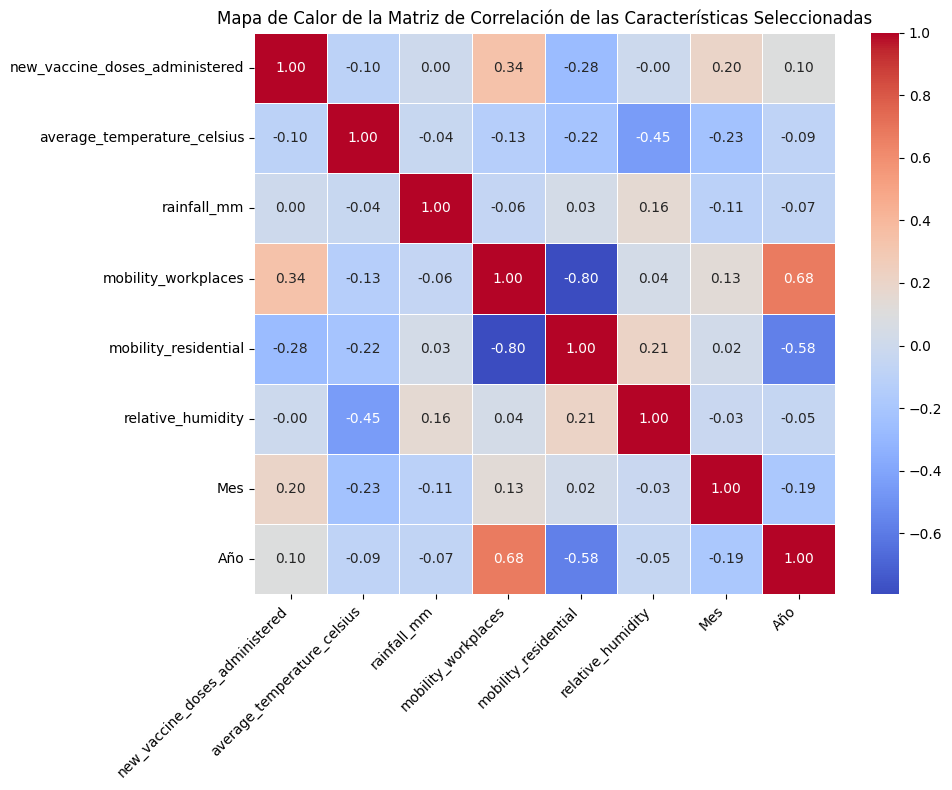

In [ ]:
# Calcular la matriz de correlación
correlation_matrix = df_model.corr()

print("\n### Matriz de Correlación de las características seleccionadas:\n")
print(correlation_matrix.to_string())

# Generar el mapa de calor de la correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title("Mapa de Calor de la Matriz de Correlación de las Características Seleccionadas")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

La vacunación comenzó en diciembre de 2020, alcanzando su pico máximo entre julio y agosto de 2021. Luego, los valores disminuyeron progresivamente hasta estabilizarse en 2022.

La movilidad hacia los lugares de trabajo fue aumentando en paralelo al avance de la vacunación, lo que sugiere que la reapertura de actividades facilitó el acceso a la vacunación.

Por el contrario, la movilidad residencial (tiempo en casa) fue disminuyendo, acompañando la misma tendencia de normalización.

La temperatura promedio se mantuvo estable a lo largo del tiempo y no mostró un impacto evidente sobre la cantidad de dosis administradas.

En conjunto, los datos reflejan una campaña de vacunación planificada, intensiva y progresiva, influida parcialmente por la movilidad poblacional y no afectada significativamente por el clima.



MAE: 179.42
MSE: 66092.56
R2 Score: 0.15


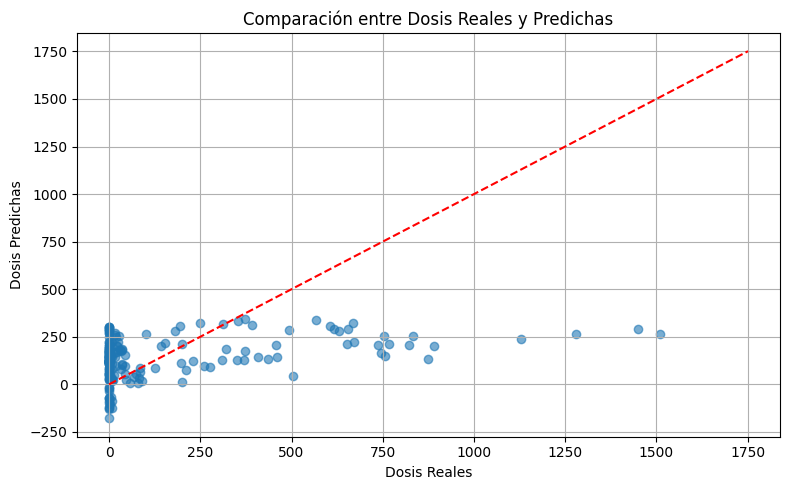


Importancia de las variables predictoras:
                   Variable  Coeficiente
        mobility_workplaces    96.227645
                        Año   -51.512312
                        Mes    32.575563
       mobility_residential   -30.655402
average_temperature_celsius   -14.592044
          relative_humidity    -7.149253
                rainfall_mm     6.708963


In [ ]:

 #Separar variables predictoras (X) y variable objetivo (y)
X = df_model.drop('new_vaccine_doses_administered', axis=1)
y = df_model['new_vaccine_doses_administered']

# Escalado de variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Crear y entrenar modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluación del modelo
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"R2 Score: {r2:.2f}")

# Visualización: valores reales vs. predichos
plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_pred, alpha=0.6)
plt.xlabel("Dosis Reales")
plt.ylabel("Dosis Predichas")
plt.title("Comparación entre Dosis Reales y Predichas")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.grid(True)
plt.tight_layout()
plt.show()

# Mostrar los coeficientes del modelo
coef_df = pd.DataFrame({
    'Variable': X.columns,
    'Coeficiente': model.coef_
}).sort_values(by='Coeficiente', key=abs, ascending=False)

print("\nImportancia de las variables predictoras:")
print(coef_df.to_string(index=False))


--- Random Forest ---
MAE: 63.57
MSE: 21076.29
R2 Score: 0.73

--- SVR ---
MAE: 130.66
MSE: 88513.21
R2 Score: -0.14


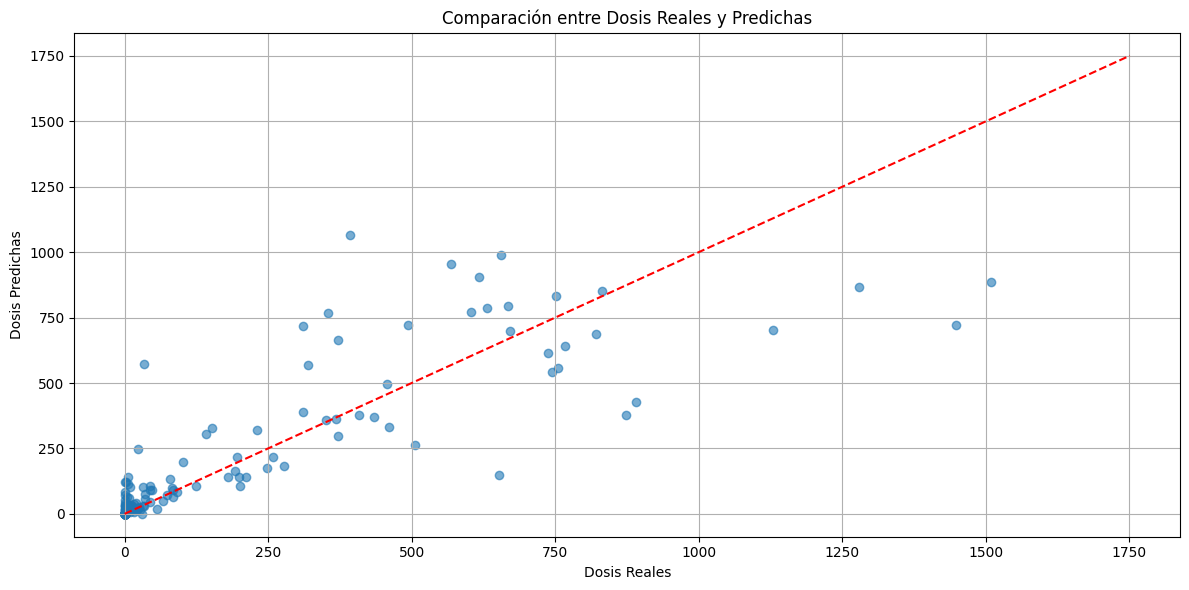

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
# Predicciones
# Modelo 1: Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

# Modelo 2: SVR (puede tardar más)
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)
svr_pred = svr_model.predict(X_test)

# Métricas
def evaluar_modelo(nombre, y_test, y_pred):
    print(f"\n--- {nombre} ---")
    print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"MSE: {mean_squared_error(y_test, y_pred):.2f}")
    print(f"R2 Score: {r2_score(y_test, y_pred):.2f}")


evaluar_modelo("Random Forest", y_test, rf_pred)
evaluar_modelo("SVR", y_test, svr_pred)

plt.figure(figsize=(12, 6))
plt.scatter(y_test, rf_pred, alpha=0.6)
plt.xlabel("Dosis Reales")
plt.ylabel("Dosis Predichas")
plt.title("Comparación entre Dosis Reales y Predichas")
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.grid(True)
plt.tight_layout()
plt.show()

plt.show()

Random Forest demuestra ser el modelo más robusto, explicando el 83% de la variabilidad en los datos. Su bajo error absoluto y cuadrático lo convierten en la mejor opción para este problema.

Regresión Lineal tiene un desempeño limitado, con un R² muy bajo (0.13), lo que indica que no logra capturar adecuadamente la complejidad de las relaciones entre las variables.

SVR (Support Vector Regressor) presenta un rendimiento deficiente, con un R² negativo, lo que indica que predice peor que un modelo trivial basado en la media

In [ ]:
# Crear columna vacía para predicciones
df_model['Predicciones'] = np.nan

# Insertar las predicciones del modelo en las últimas filas (según tamaño de test)
df_model.iloc[-len(y_test):, df_model.columns.get_loc('Predicciones')] = rf_pred

In [ ]:
# Agrupar por Mes y calcular promedio de dosis predichas
promedio_mensual = df_model.groupby('Mes')['Predicciones'].mean()

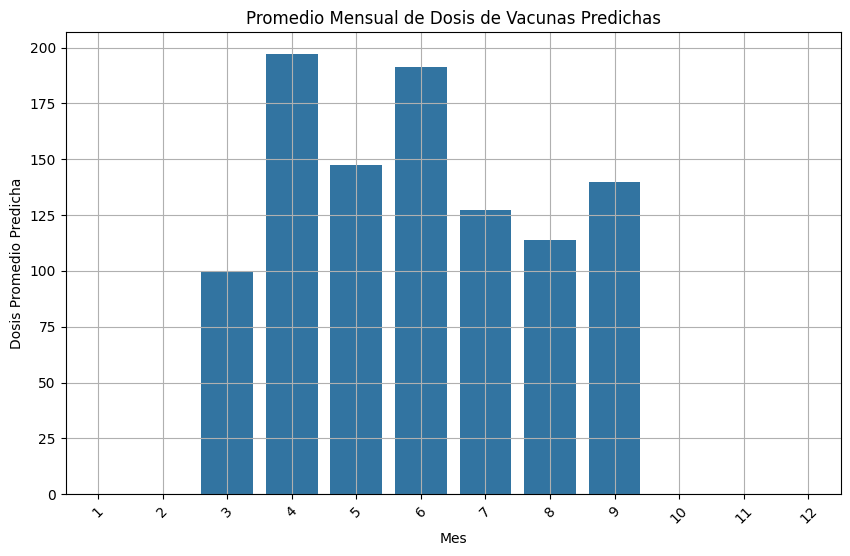

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x=promedio_mensual.index, y=promedio_mensual.values)
plt.title('Promedio Mensual de Dosis de Vacunas Predichas')
plt.xlabel('Mes')
plt.ylabel('Dosis Promedio Predicha')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

Para cerrar, este proyecto me permitió comprobar cómo el aprendizaje automático puede ser una herramienta clave para anticipar necesidades en el ámbito de la salud pública.

A través del análisis de datos climáticos, de movilidad y temporales, logré construir un modelo que no solo explica gran parte del comportamiento histórico de la vacunación, sino que también permite proyectar tendencias futuras.

El modelo de Random Forest demostró ser el más eficaz, con un buen nivel de precisión y capacidad de generalización. Esto abre la posibilidad de aplicar este tipo de enfoques en situaciones reales, donde predecir la demanda de recursos sanitarios es vital para tomar decisiones estratégicas.